In [1]:
#Importing Basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#loading dataset 
covidindia=pd.read_csv(r'C:\Users\goswa\Desktop\covid-19 regression ML\covid_19_india.csv')
covidindia=covidindia.loc[:586]

In [3]:
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covidindia.shape

(587, 9)

In [5]:

covidindia['Date']=pd.to_datetime(covidindia['Date'])
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [6]:
#Finding out missing data 
covidindia.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
#Incase if the missing value is not NaN but '-' then replace it with 0
covidindia['ConfirmedForeignNational']=covidindia['ConfirmedForeignNational'].replace('-',0,inplace=True)
covidindia['ConfirmedIndianNational']=covidindia['ConfirmedIndianNational'].replace('-',0,inplace=True)
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,None,None,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,None,None,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,None,None,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,None,None,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,None,None,0,0,3


In [8]:
covidindia.isnull().sum()

Sno                           0
Date                          0
Time                          0
State/UnionTerritory          0
ConfirmedIndianNational     587
ConfirmedForeignNational    587
Cured                         0
Deaths                        0
Confirmed                     0
dtype: int64

In [9]:
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,None,None,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,None,None,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,None,None,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,None,None,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,None,None,0,0,3


In [10]:
covidindia['ConfirmedIndianNational']=covidindia['ConfirmedIndianNational'].astype('float64')
covidindia['ConfirmedForeignNational']=covidindia['ConfirmedForeignNational'].astype('float64')
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,NaN,NaN,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,NaN,NaN,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,NaN,NaN,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,NaN,NaN,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,NaN,NaN,0,0,3


In [11]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
covidindia['State/UnionTerritory']=lbl.fit_transform(covidindia['State/UnionTerritory'])

In [12]:
covidindia["ConfirmedForeignNational"]=covidindia['ConfirmedForeignNational'].fillna(0,inplace=False)
covidindia["ConfirmedIndianNational"]=covidindia['ConfirmedIndianNational'].fillna(0,inplace=False)
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,14,0.0,0.0,0,0,1
1,2,2020-01-31,6:00 PM,14,0.0,0.0,0,0,1
2,3,2020-01-02,6:00 PM,14,0.0,0.0,0,0,2
3,4,2020-02-02,6:00 PM,14,0.0,0.0,0,0,3
4,5,2020-03-02,6:00 PM,14,0.0,0.0,0,0,3


In [13]:
covidindia['Date']=covidindia['Date'].astype('datetime64[ns]')
covidindia['date']=covidindia['Date'].dt.day
covidindia['month']=covidindia['Date'].dt.month
covidindia.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date,month
0,1,2020-01-30,6:00 PM,14,0.0,0.0,0,0,1,30,1
1,2,2020-01-31,6:00 PM,14,0.0,0.0,0,0,1,31,1
2,3,2020-01-02,6:00 PM,14,0.0,0.0,0,0,2,2,1
3,4,2020-02-02,6:00 PM,14,0.0,0.0,0,0,3,2,2
4,5,2020-03-02,6:00 PM,14,0.0,0.0,0,0,3,2,3


In [14]:
#modelselection
linear=LinearRegression()
logistic=LogisticRegression()
tree=DecisionTreeRegressor()
forest=RandomForestRegressor(n_estimators=10)

In [15]:
#Splitting training and testing data(80:20)
from sklearn.model_selection import train_test_split
x=covidindia[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covidindia['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
#Fitting models
linear.fit(x_train,y_train)
logistic.fit(x_train,y_train)
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)

C:\Users\goswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
#PREDICTION
from sklearn.metrics import r2_score
prediction=logistic.predict(x_test)
score1=r2_score(y_test,prediction)

In [18]:
prediction=linear.predict(x_test)
score2=r2_score(y_test,prediction)

In [19]:
prediction=tree.predict(x_test)
score3=r2_score(y_test,prediction)

In [20]:
prediction=forest.predict(x_test)
score4=r2_score(y_test,prediction)

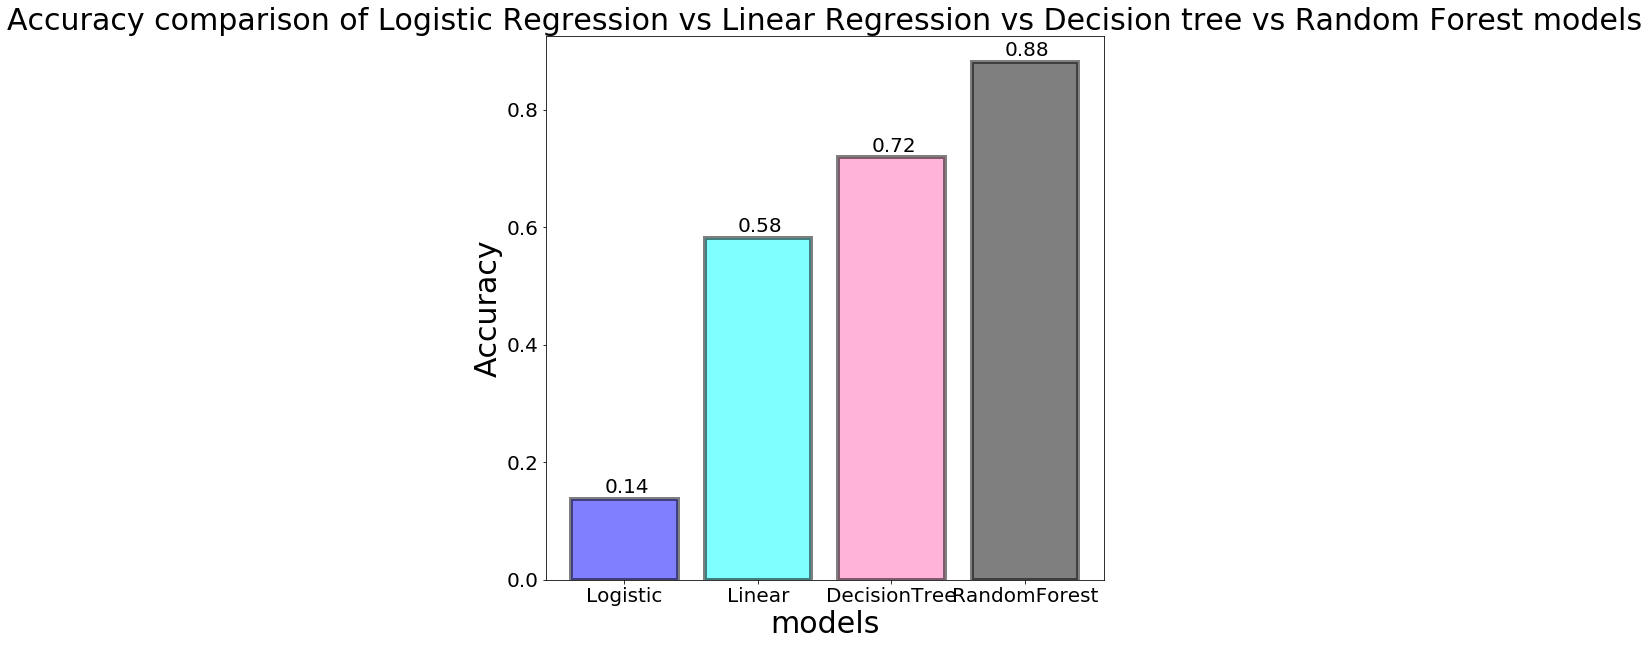

In [25]:
scores=[score1,score2,score3,score4]
models=['Logistic','Linear','DecisionTree','RandomForest']
plt.figure(figsize=(10,10))
plt.title('Accuracy comparison of Logistic Regression vs Linear Regression vs Decision tree vs Random Forest models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['blue','cyan','hotpink','black'],alpha=0.5,linewidth=4,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.01,format(scores[i],'.2f'),fontsize=20)